# Assignment 7: Mathematical modelling - model estimation
This assignment introduces you to the estimation of parameters through the minimization of a loss function. We are doing this in the context of linear regression. You will learn to plot the relationship between 2 variables, write a function that makes the model prediction, write a function that calculates the loss function, and how to estimate the parameters of the model. While there are many libraries that implement simple regression, you are learning here a universal way that is applicable to ANY mathematical model. 

The data set possum.csv is a sample of 46 possums that were caught in Victoria (NZ) in a field study. 
- age:  Age (years).
- headL:  Head length, in mm.
- skullW:  Skull width, in mm.
- totalL:  Total length, in cm.
- tailL:  Tail length, in cm.


## Preliminaries

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as so
import pandas as pd 
import numpy as np

## Task 1: Scatterplots
### Question 1
Make a scatter plot between age and head size. Make sure to label your x-axis and y-axis. Written answer: is there a relationship between the two variables? How would you describe it qualitatively (is the relationship positive or negative, is it linear, etc)? 

In [2]:
D = pd.read_csv('possum.csv')

Text(0, 0.5, 'headlength[mm]')

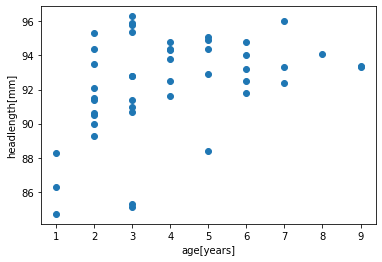

In [3]:
fig=plt.figure()
ax =fig.add_subplot(1,1,1)    
ax.scatter(D.age,D.headL)
plt.xlabel('age[years]')
plt.ylabel('headlength[mm]')

*Figure 1* scatter plot showing head size vs. age. A positive relationship can be observed between the two variables.

> There is a positive relationship between Age and head length. The relationship is not 100% linear: it seems to increase a lot in the first year and then stay mostly stable

### Question 2. 
Make a scatter plot between head size and skull width. Written answer: is there a relationship between the two variables? How would you describe it qualitatively? Are there unusual data points (i.e. outliers) in the data set? What may be a possible explanation?    

Text(0, 0.5, 'skull width[mm]')

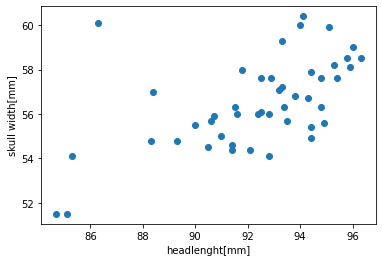

In [4]:
fig=plt.figure()
ax =fig.add_subplot(1,1,1)    
ax.scatter(D.headL,D.skullW)
plt.xlabel('headlenght[mm]')
plt.ylabel('skull width[mm]')

*Figure 2* scatter plot, plotting skull width vs. head size. A positive relationship can be observed between the two variables.

> There is a positive relation between head length and skull width. There is one indiivudal with a very wide but a short head. Possibly a different species or measurement error?

## Task 2 Fit a linear regression line "by hand"
### Question 1
Write a function simpleRegPredict(b,x) that takes as an input b a list of two parameter [intercept,slope] and as x values of an x-variable. The function should then return the predicted values for y following the linear model (see lecture). Call the function using b=[83,2] as parameters and to predict the value for x=2. 


In [5]:
def simpleRegPredict(b,x):
    yp=b[0]+b[1]*x # b[0] will be the intercept and b[1] will be the slope
    return yp 

b=[83,2]
simpleRegPredict(b,2)

87

### Question 2
Write a function plotPrediction(b,x,y,fcn=simpleRegPredict) that makes a scatter plot of the x vs. the y-variable and then plots a regression line into the plot (see lecture / lab for hints). Call the function for x being the age, y=headL, and b=[83,2].

Text(0, 0.5, 'HeadLength[cm]')

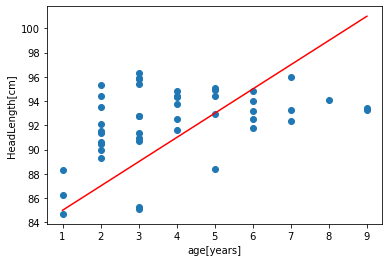

In [6]:
def plotPrediction(b,x,y,predictFcn=simpleRegPredict):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y)
    xp = np.linspace(min(x),max(x),num=50)
    yp = predictFcn(b,xp)
    ax.plot(xp,yp,'r')

b=[83,2]
plotPrediction(b,D.age,D.headL)
plt.xlabel('age[years]')
plt.ylabel('HeadLength[cm]')

*Figure 3*. scatter plot of head size vs. age with the line estimated by linear regression in red.

### Question 3
Write a loss function simpleRegLossRSS(b,x,y) that takes as the inputs the parameters (b), the explanatory (x) and the response variable (y) and then calculates and returns the residual sum-of-squares of the linear fit. It also should return the derivate of the Loss function in respect to the two parameters (see lecture / lab). The function should use your function simpleRegPred. Call the function with b=[83,2] as parameters, x=age and y= headL. What is the residual sum of squares? What is the derivative? In order to minimize the Loss, would you need to increase or decrease the slope/intercept? 

In [7]:
def simpleRegLossRSS(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    deriv = np.zeros(2)
    deriv[0]=-2*sum(res)
    deriv[1]=-2*sum(res*x)
    return (rss,deriv)

b=[83,2]
simpleRegLossRSS(b,D.age,D.headL)

(818.3900000000001, array([-128.6,   54.2]))

### Question 4
First try to reduce the slope value and try parameter values b=[83,0.6]. Then increase the intercept and try b=[89,0.6]. For each value make the prediction plot and report the residual-sum-of squares using your functions from question 2 and 3. Which fit provides the lowest loss (rss)? How do the derivatives change for each value? And according to the derivative, which direction should you change the parameters? Play around with other parameter settings. Can you find one that gives you a loss below rss=350? 

(2537.8700000000003, array([ -638.2, -2510.6]))

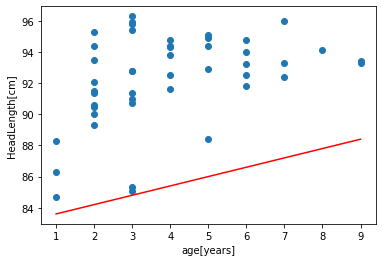

In [8]:
b=[83,0.6]
plotPrediction(b,D.age,D.headL)
plt.xlabel('age[years]')
plt.ylabel('HeadLength[cm]')
simpleRegLossRSS(b,D.age,D.headL)

*Figure 4*. scatter plot of head size vs. age with the line estimated by linear regression in red.

(364.66999999999985, array([ -86.2, -326.6]))

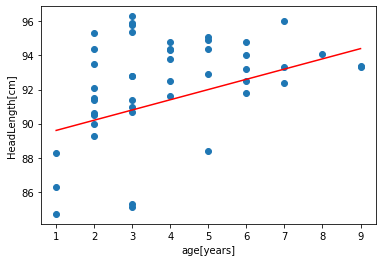

In [9]:
b=[89,0.6]
plotPrediction(b,D.age,D.headL)
plt.xlabel('age[years]')
plt.ylabel('HeadLength[cm]')
simpleRegLossRSS(b,D.age,D.headL)

*Figure 5*. scatter plot of head size vs. age with the line estimated by linear regression in red.

> The second linear model is better. <br>
simpleRegLossRSS returns rss and the derivative. As can be seen in the output of this function, increasing the intercept will cause the derivative to decrease. Hence, changing the intercept would be a better choice.

(339.86360000000025, array([ -15.04, -166.52]))

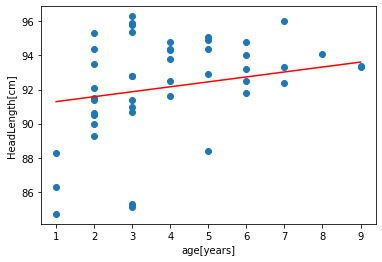

In [10]:
b=[91,0.29]
plotPrediction(b,D.age,D.headL)
plt.xlabel('age[years]')
plt.ylabel('HeadLength[cm]')
simpleRegLossRSS(b,D.age,D.headL)

*Figure 6*. scatter plot of head size vs. age with the line estimated by linear regression in red.

## Task 3: Fit the linear model using scipy.optimize.minimize
### Question 1
Use scipy.optimize.minimize to minimize the function value of simpleRegLossRSS(b,x,y) from task 2, question 2. As starting values simply give b0=[0,0]
Show the result structure. Written answer: What is the estimated parameter value for intercept and slope and what is the best achieved rss? 

In [11]:
b0=[0,0]
RESULT = so.minimize(simpleRegLossRSS,b0,args=(D.age,D.headL),jac=True)
RESULT

      fun: 324.0206458055927
 hess_inv: array([[ 0.05082114, -0.01009765],
       [-0.01009765,  0.00255215]])
      jac: array([-4.51905180e-12, -3.36228823e-11])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([90.08288948,  0.56311585])

### Question 2
Use your function plotPrediction (from above) to plot this best linear fit between age and head length. 

Text(0, 0.5, 'HeadLength[cm]')

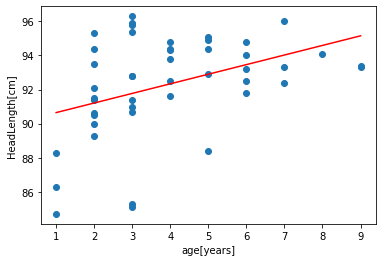

In [12]:
plotPrediction(RESULT.x,D.age,D.headL)
plt.xlabel('age[years]')
plt.ylabel('HeadLength[cm]')

*Figure 7*. scatter plot of head size vs. age with the line estimated by linear regression in red.

### Question 3
Calculate the total sum-of-squares by subtracting the mean from all the y-values, squaring the result and finally summing them up. What is the total sum of squares for headL? 

In [13]:
y=D.headL
res = y-np.mean(y)
TSS = sum(res**2)
TSS

386.14456521739135

> The total sum of squares for head length is 386.14

### Question 4
Write a function simpleRegFit(x,y) that (a) estimates the parameters as done in Question 3.1, (b) plots the predictions as done in 3.2 and (c) calculates (and returns) R2 of the fit.  Call the function with x=age and y=headL.  Written answer: What is the R2 of the fit? How can you interpret it? 

R2= (0.16088254246650824, array([90.08288948,  0.56311585]))


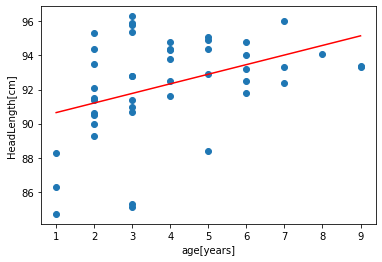

In [14]:
def simpleRegFit(x,y,lossfcn=simpleRegLossRSS):
    b0=[np.mean(y),0]
    RES = so.minimize(lossfcn,b0,args=(x,y),jac=True)
    b=RES.x # Results
    plotPrediction(b,x,y,simpleRegPredict)
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,grad = simpleRegLossRSS(b,x,y)
    R2 = 1-RSS/TSS 
    return (R2,b)

R2=simpleRegFit(D.age,D.headL)
plt.xlabel('age[years]')
plt.ylabel('HeadLength[cm]')
print('R2=',R2)

*Figure 8*. scatter plot of head size vs. age with the line estimated by linear regression in red.

> The R2 value is 0.161. That means that the linear model can account for 16.1% of the Head length

### Question 5
Fit a linear model between age (x) and tail length (y). How good is the fit? Are there outliers? How much would the slope of the line change if you excluded the outlier?  

R2= (0.22286587947604075, array([33.35046605,  0.75372836]))


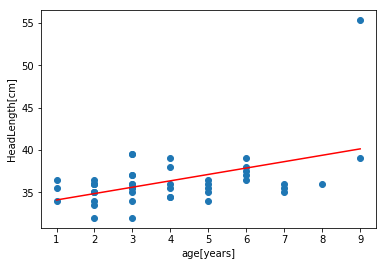

In [47]:
R2=simpleRegFit(D.age,D.tailL)
plt.xlabel('age[years]')
plt.ylabel('TailLength[cm]')
print('R2=',R2)

*Figure 9*. scatter plot of head size vs. age with the line estimated by linear regression in red.

> There is a 9-year old specimen that has a tail that is approx 15cm long than any of the other animals. Possibly a different species or subspecies of possum? Or a measurement error? Exclusion of the point would lower the slope of the line considerably. 